In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [199]:
df=pd.read_csv('kaggle_diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [200]:
#lets describe the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [201]:
#there are 0 values in Glucose,BloodPressure,SkinThickness,Insulin,BMI columns which isnt practically possible
#Hence, impute the zero values with their mean

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= 0, strategy='mean')
X1= imputer.fit_transform(df.iloc[:,:])

In [202]:
X1

array([[2.00000000e+00, 1.38000000e+02, 6.20000000e+01, ...,
        1.27000000e-01, 4.70000000e+01, 1.00000000e+00],
       [4.35962331e+00, 8.40000000e+01, 8.20000000e+01, ...,
        2.33000000e-01, 2.30000000e+01, 1.00000000e+00],
       [4.35962331e+00, 1.45000000e+02, 7.24036649e+01, ...,
        6.30000000e-01, 3.10000000e+01, 1.00000000e+00],
       ...,
       [6.00000000e+00, 8.50000000e+01, 7.80000000e+01, ...,
        3.82000000e-01, 4.20000000e+01, 1.00000000e+00],
       [4.35962331e+00, 1.29000000e+02, 1.10000000e+02, ...,
        3.19000000e-01, 2.60000000e+01, 1.00000000e+00],
       [2.00000000e+00, 8.10000000e+01, 7.20000000e+01, ...,
        5.47000000e-01, 2.50000000e+01, 1.00000000e+00]])

In [203]:
#infromation of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [204]:
#any null values 
#not neccessary in above information we can see
df.isnull().values.any()

False

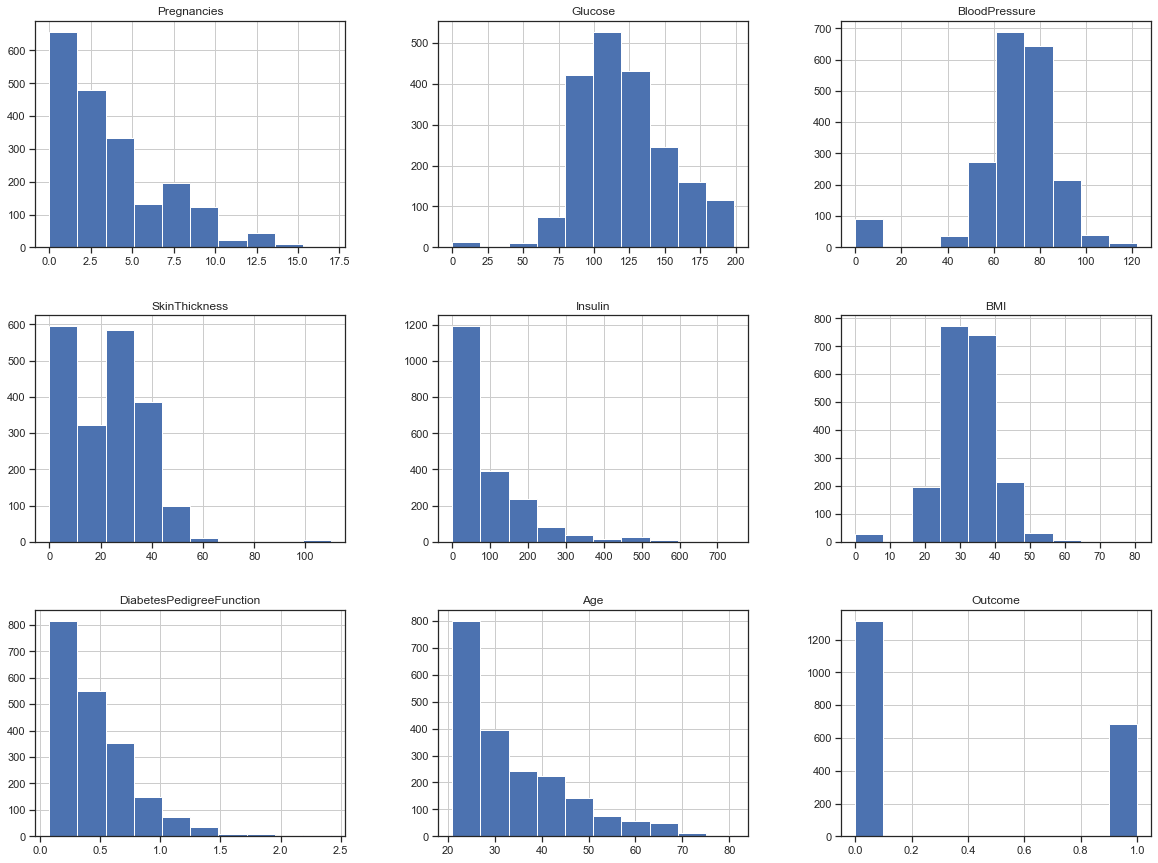

In [205]:
#histogram
df.hist(bins=10,figsize=(20,15))
plt.show()

<AxesSubplot:>

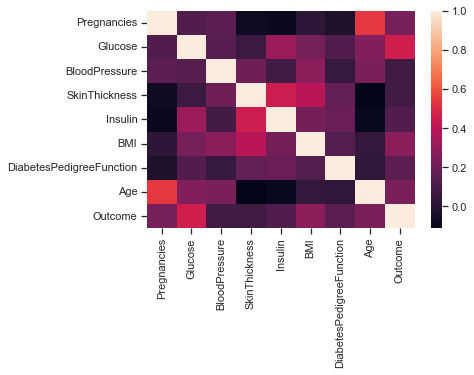

In [206]:
#correlation

sns.heatmap(df.corr())
# we can see skin thickness,insulin,pregnencies and age are full independent to each other
#age and pregencies has negative correlation

<AxesSubplot:xlabel='count', ylabel='Outcome'>

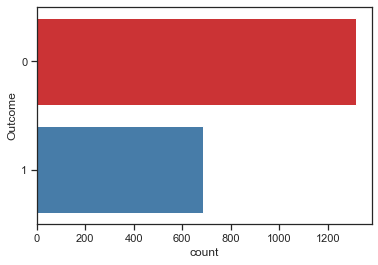

In [207]:
#lets count total outcome in each target 0 1
#0 means no diabeted
#1 means patient with diabtes
sns.countplot(y=df['Outcome'],palette='Set1')

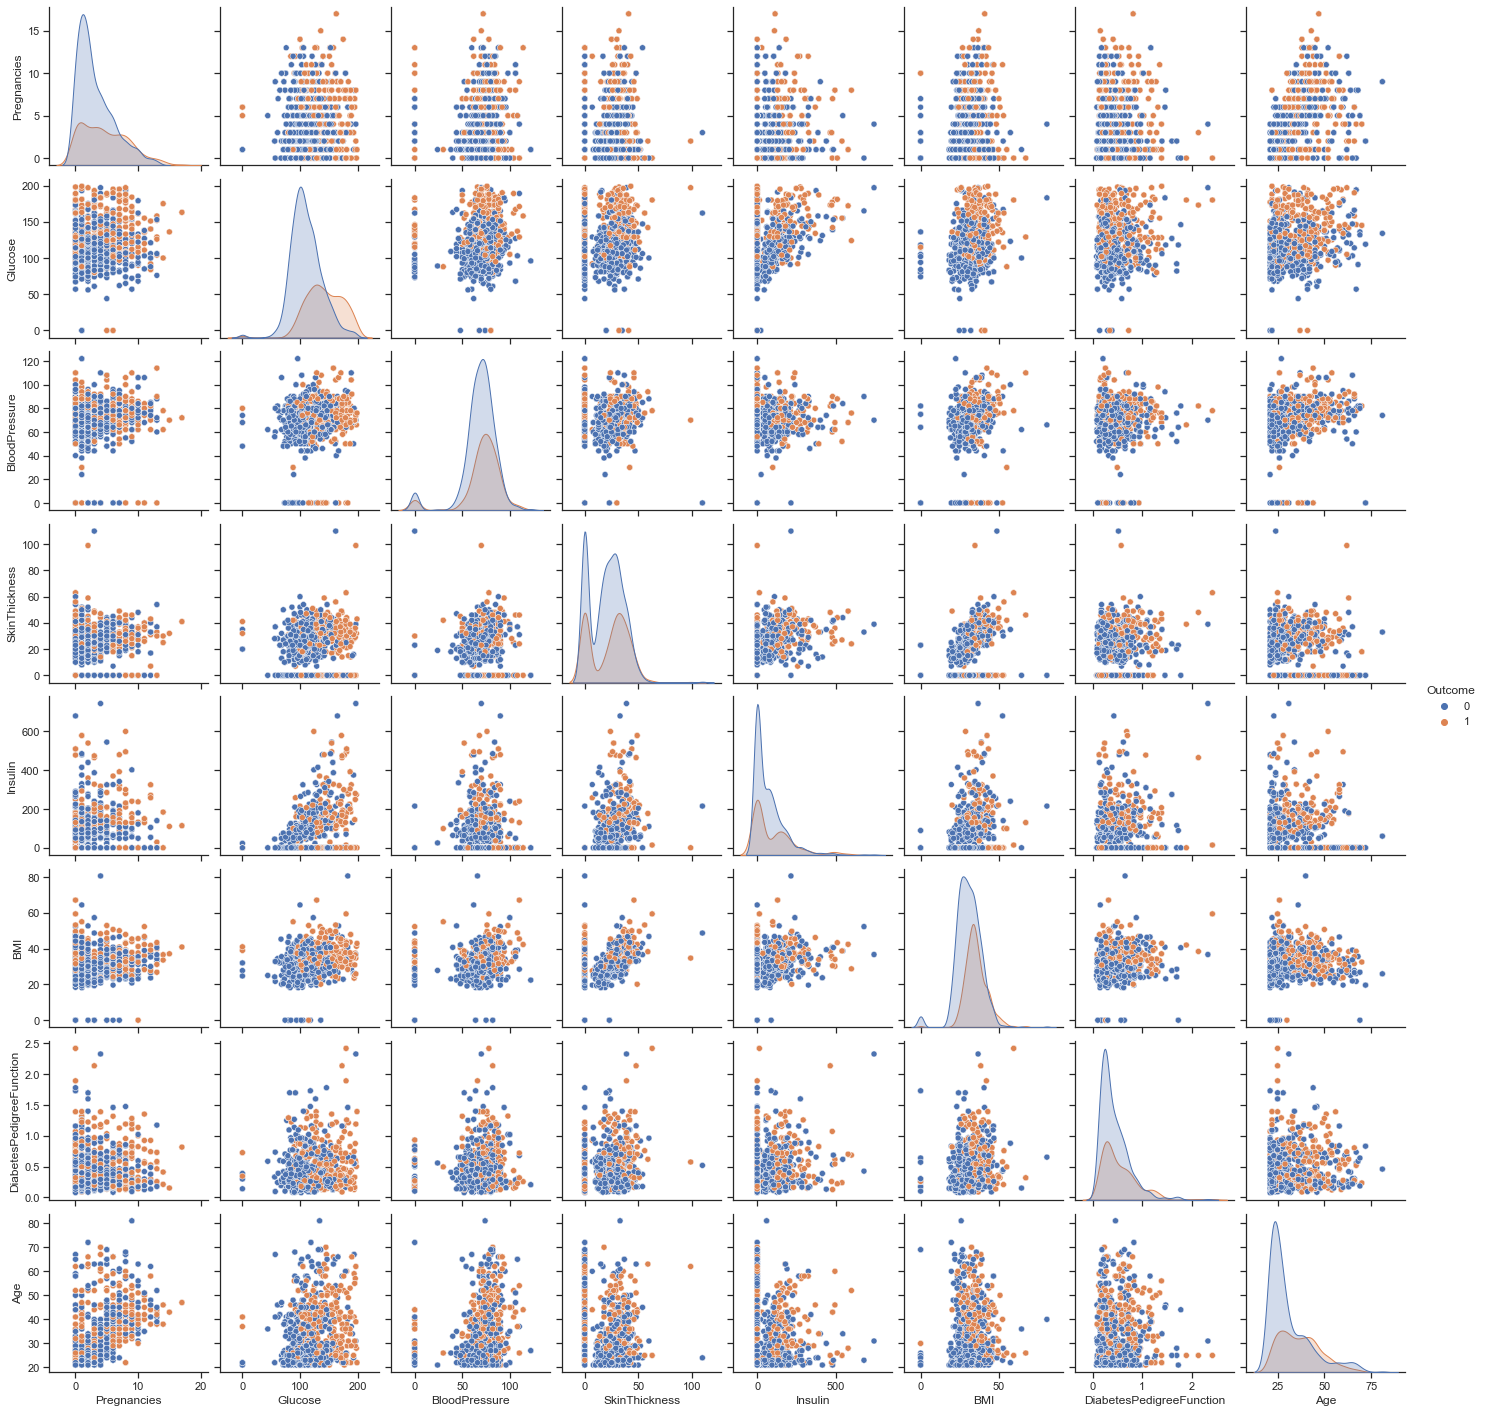

In [208]:
sns.set(style="ticks")
sns.pairplot(df, hue="Outcome")

<AxesSubplot:>

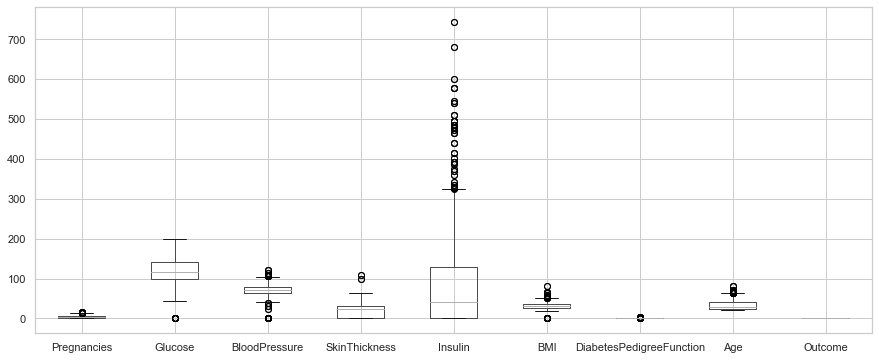

In [209]:
#box plot for outlier visualization
sns.set(style="whitegrid")
df.boxplot(figsize=(15,6))

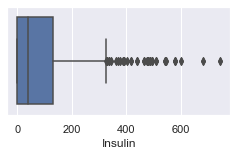

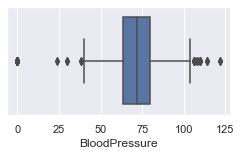

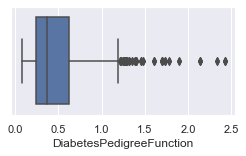

In [210]:
#box plot
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=df['Insulin'])
plt.show()
sns.boxplot(x=df['BloodPressure'])
plt.show()
sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.show()

In [211]:
#outlier remove

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)

#print((df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR)))

---Q1--- 
 Pregnancies                  1.000
Glucose                     99.000
BloodPressure               63.500
SkinThickness                0.000
Insulin                      0.000
BMI                         27.375
DiabetesPedigreeFunction     0.244
Age                         24.000
Outcome                      0.000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                   6.000
Glucose                     141.000
BloodPressure                80.000
SkinThickness                32.000
Insulin                     130.000
BMI                          36.800
DiabetesPedigreeFunction      0.624
Age                          40.000
Outcome                       1.000
Name: 0.75, dtype: float64

---IQR---
 Pregnancies                   5.000
Glucose                      42.000
BloodPressure                16.500
SkinThickness                32.000
Insulin                     130.000
BMI                           9.425
DiabetesPedigreeFunction      0.380
Age                 

In [212]:
#outlier remove
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape,df_out.shape
#more than 80 records deleted

((2000, 9), (1652, 9))

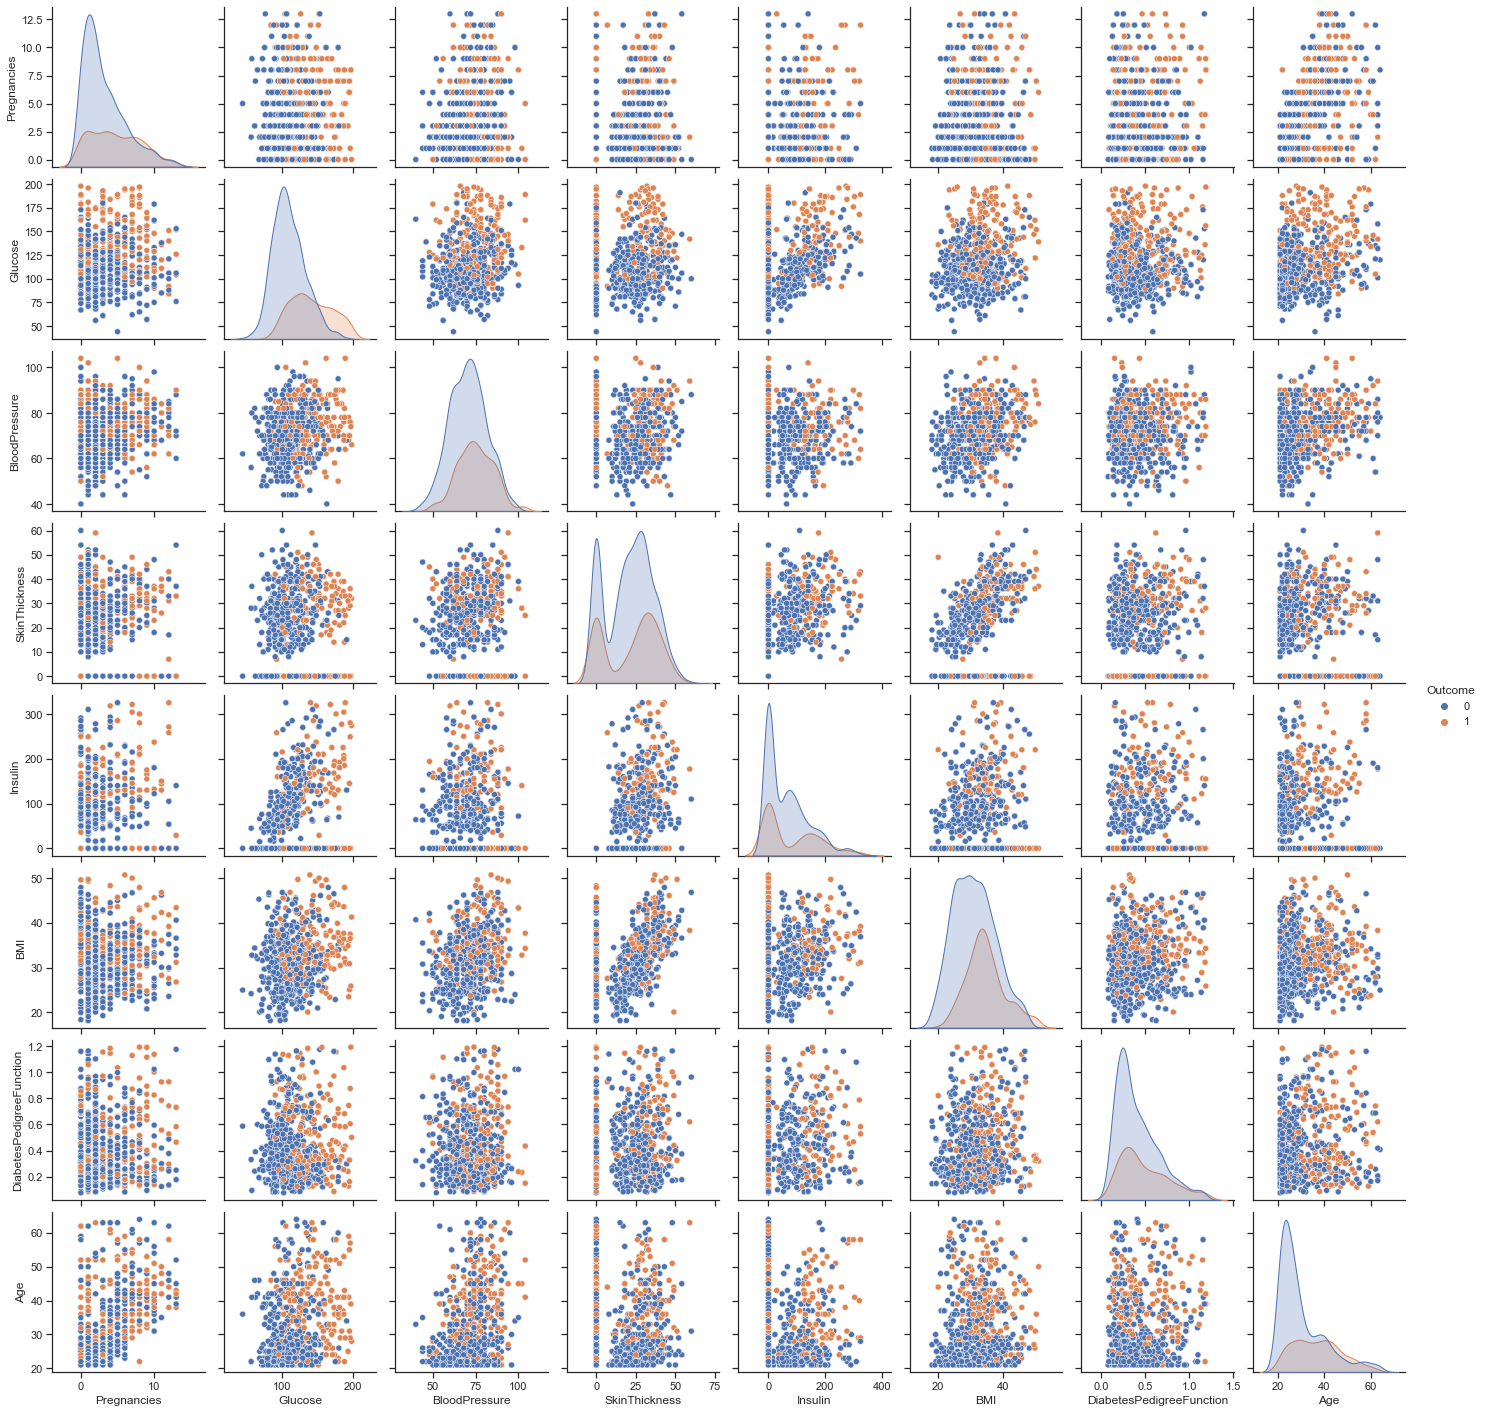

In [213]:
#Scatter matrix after removing outlier
sns.set(style="ticks")
sns.pairplot(df_out, hue="Outcome")
plt.show()

In [214]:
#lets extract features and targets
X=df_out.drop(columns=['Outcome'])
y=df_out['Outcome']

In [215]:
#Splitting train test data 80 20 ratio
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [216]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((1321, 8), (331, 8), (1321,), (331,))

In [217]:
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.model_selection import cross_validate

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

#cross validation purpose
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}

def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])

In [218]:
#Lets build the model

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

acc=[]
roc=[]

clf=LogisticRegression()
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()

C:\Users\sumeet\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sumeet\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st


Accuracy 0.770392749244713 ROC 0.6988888888888889
TP:  [25 30 20 20 20 21 18 18 19 22]
TN:  [83 76 82 83 86 77 84 83 81 82]
FN:  [16 11 21 21 21 20 23 23 22 19]
FP:  [ 9 15  9  8  5 14  7  8 10  9]


C:\Users\sumeet\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sumeet\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [219]:
#Support Vector Machine


In [220]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.8489425981873112 ROC 0.8215303983228511
TP:  [34 33 32 29 31 28 31 25 34 33]
TN:  [82 83 83 77 86 86 83 80 83 76]
FN:  [ 7  8  9 12 10 13 10 16  7  8]
FP:  [10  8  8 14  5  5  8 11  8 15]


In [221]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(train_X,train_y)

y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.9577039274924471 ROC 0.9638993710691824
TP:  [39 40 38 34 40 40 40 37 38 39]
TN:  [91 89 89 91 91 88 90 87 88 89]
FN:  [2 1 3 7 1 1 1 4 3 2]
FP:  [1 2 2 0 0 3 1 4 3 2]


In [222]:
#Naive Bayes Theorem
#import library
from sklearn.naive_bayes import GaussianNB

clf=GaussianNB()
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.7522658610271903 ROC 0.7080083857442349
TP:  [28 31 27 21 22 24 24 22 22 25]
TN:  [73 75 80 82 83 74 77 69 77 78]
FN:  [13 10 14 20 19 17 17 19 19 16]
FP:  [19 16 11  9  8 17 14 22 14 13]


In [223]:
#Gradient Boosting Classifier


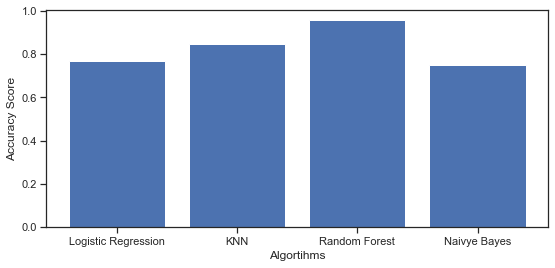

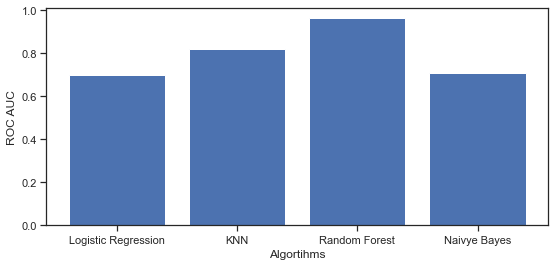

In [224]:
#lets plot the bar graph

ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','KNN','Random Forest','Naivye Bayes'],acc,label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algorithms')
plt.show()

ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','KNN','Random Forest','Naivye Bayes'],roc,label='ROC AUC')
plt.ylabel('ROC AUC')
plt.xlabel('Algorithms')
plt.show()

In [225]:

#Random forest has highest accuracy 95% and ROC_AUC curve 98%
#model can be improve more if we take same count of labels
#in our model 30% is diabetic and 70% no diabetic patient